In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Figuras que uso a lo largo de la tesis, para que los estilos sean coherentes.

In [2]:
%matplotlib inline

import glob
import itertools

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import tensorflow as tf
import fuzzle.lvars
import fuzzle.mfs

from pynsia.tensorflow import fuzzy as tfz

plt.style.use('seaborn-paper')

plt.rcParams['figure.figsize'] = (10, 6)

## Edad de los conductores por género

In [ ]:
df = pd.DataFrame({
    'Edades':['15-17','18-20','21-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','74+',],
    'Hombres':[39341,318037,729846,1097874,1472038,1828905,1768957,1688069,1460193,1256212,1082591,974768,709285,1190514],
    'Mujeres':[15697,238534,651961,1054377,1337432,1568926,1445740,1321330,1055472,810168,569461,387158,189829,1138945],
})
fig, ax = plt.subplots()
df.plot(kind='bar', ax=ax)
ax.set_xticklabels(df['Edades'])
ax.legend(loc="best");
fig.savefig('thesis-figures/drivers-ages-per-genre.pdf',bbox_inches='tight')

## Rise of deep learning

In [ ]:
def l(x, a, b, c, k, m, v, q):
    return a + (k - a)/ np.power((c + q * np.exp(-b * (x - m))), 1 / v)


x = np.arange(0.75, 2, 0.001)
y1 = l(x, 0, 5, 0.1, 1, 1, 1, 1)
y2 = l(x, 0, 4.5, 0.15, 1, 1, 1, 1)
y3 = l(x, 0, 4, 0.25, 1, 1, 1, 1)
y4 = l(x, 0, 3.5, 0.5, 1, 1, 1, 1)

# Setup centered axes
fig, ax = plt.subplots()
ax.set_ylim((-1, 10))

# Create and show plot
ax.plot(x, y1, label="Deep learning")
ax.plot(x, y2, label="Deeper networks")
ax.plot(x, y3, label="Shallow networks")
ax.plot(x, y4, label="Traditional CI")
ax.legend(loc="best");
ax.set_ylabel('Performance')
ax.set_xlabel('Amount of data')
ax.set_yticklabels([])
ax.set_xticklabels([])
fig.savefig('thesis-figures/deep-learning-capabilities.pdf',bbox_inches='tight')

## Función de activación: sigmoide

In [ ]:
def sigmoid(x):
    return 1./(1+np.e**(-x))

x = np.arange(-5, 5, 0.01)
y = sigmoid(x)
dx = y * (1 - y)

# Setup centered axes
fig, ax = plt.subplots()
ax.set_ylim((-0.1, 1.1))

# Create and show plot
ax.plot(x, y, label="$\sigma(x)$")
ax.plot(x, dx, label="$\\frac{\partial \sigma(x)}{\partial x}$")
ax.legend(loc="best");
fig.savefig('thesis-figures/sigmoid-function.pdf',bbox_inches='tight')

## Función de activación: tangente hiperbólica

In [ ]:
def tanh(x):
    return 1./(1 + np.e ** (-x))

x = np.arange(-5, 5, 0.01)
y = np.tanh(x)
dx = 1 - y ** 2

# Setup centered axes
fig, ax = plt.subplots()
ax.set_ylim((-1.1, 1.1))

# Create and show plot
ax.plot(x, y, label="$tanh(x)$")
ax.plot(x, dx, label="$\\frac{\partial tanh(x)}{\partial x}$")
ax.legend(loc="best");
fig.savefig('thesis-figures/tanh-function.pdf',bbox_inches='tight')

## Función de activación: ReLU

In [ ]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-1, 2, 0.01)
y = relu(x)
dx = [0 if r <= 0 else 1 for r in x]

# Setup centered axes
fig, ax = plt.subplots()
ax.set_ylim((-0.1, 1.5))

# Create and show plot
ax.plot(x, y, label="$ReLU(x)$")
ax.plot(x, dx, label="$\\frac{\partial ReLU(x)}{\partial x}$")
ax.legend(loc="best");
fig.savefig('thesis-figures/relu-function.pdf',bbox_inches='tight')

## Función de activación: Leaky ReLU

In [ ]:
leak = 0.1
def leaky_relu(x):
    return np.maximum(leak * x, x)

x = np.arange(-1, 2, 0.01)
y = leaky_relu(x)
dx = [leak if r <= 0 else 1 for r in x]

# Setup centered axes
fig, ax = plt.subplots()
ax.set_ylim((-0.1, 1.5))

# Create and show plot
ax.plot(x, y, label="$LReLU(x, 0.1)$")
ax.plot(x, dx, label="$\\frac{\partial L-ReLU(x, 0.1)}{\partial x}$")
ax.legend(loc="best");
fig.savefig('thesis-figures/leaky-relu-function.pdf',bbox_inches='tight')

## Funciones de pertenencia trangular y trapezoidal

In [ ]:
def f(x, a, Δb, Δc, Δd):
    line_asc = (x - a) / Δb
    line_des = (a + Δb + Δc - x) / Δd + 1
    union = min(line_asc, line_des)
    return min(max(union, 0), 1)

x = np.arange(-4, 7, 0.01)
trimf = [f(e, -3, 2, 0, 1) for e in x]
trapmf = [f(e, 1, 1, 3, 1) for e in x]

# Setup centered axes
fig, ax = plt.subplots()
ax.set_ylim((-0.1, 1.1))

# Create and show plot
ax.plot(x, trimf, label="triangular($-3, -1, 0$)")
ax.plot(x, trapmf, label="trapezoidal($1, 2, 5, 6$)")
ax.legend(loc="best");
fig.savefig('thesis-figures/trimf-trapmf.pdf',bbox_inches='tight')

## Perfiles de aceleración en los conjuntos de entrenamiento y test

In [ ]:
df = pd.read_csv('data/cf-all-training.csv', index_col=None)
fig, ax = plt.subplots()

df['Acceleration'].plot(ax=ax, label="Acceleration ($m/s^2$)");
ax.legend(loc="best");
fig.savefig('thesis-figures/acceleration-profile-training.pdf',bbox_inches='tight')

In [ ]:
df = pd.read_csv('data/cf-all-validation.csv', index_col=None)
fig, ax = plt.subplots()

df['Acceleration'].plot(ax=ax, label="Acceleration ($m/s^2$)");
ax.legend(loc="best");
fig.savefig('thesis-figures/acceleration-profile-test.pdf',bbox_inches='tight')

## Car following

Las gráficas de los modelos entrenados para el comportamiento longitudinal

### Perceptrón multicapa (para todos los sujetos)

In [ ]:
X_LIM = (0, 100)

rms_files = sorted([f for f in glob.glob('final-outputs/cf-mlp-rms-all-*.csv')], key=lambda x: (len(x), x))
out_files = sorted([f for f in glob.glob('final-outputs/cf-mlp-outputs-all-*.csv')], key=lambda x: (len(x), x))
architectures = [s.replace('.csv', '').replace('final-outputs/cf-mlp-rms-all-', '') for s in rms_files]
rms_dfs = [pd.read_csv(f, index_col=None) for f in rms_files]
out_dfs = [pd.read_csv(f, index_col=None) for f in out_files]

#### Tabla de errores

Un resumen de los errores sacados tras el entrenamiento por arquitectura

In [ ]:
table = {
    'architecture':[],
    'training':[],
    'validation':[],
    'test':[],
}
for i, (architecture, df) in enumerate(zip(architectures, rms_dfs)):
    table['architecture'].append(architecture)
    table['training'].append(df['training'].iloc[-1])
    table['validation'].append(df['validation'].iloc[-1])
    table['test'].append(df['test'].iloc[-1])
df = pd.DataFrame(table, index=None)
df.set_index('architecture')

#### RMS en training y validation superpuestas

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.set_title('RMS training & validation (all subjects)')
ax.set_xlim(*X_LIM)
ax.set_ylim(0.04, 0.065)
stage_df = pd.DataFrame()
lines_training = []
lines_validation = []
for i, (architecture, df) in enumerate(zip(architectures, rms_dfs)):
    lines_training += ax.plot(df['training'], label=architecture, color='C{}'.format(i))
    lines_validation += ax.plot(df['validation'], color='C{}'.format(i), alpha=0.3)
ax.legend(handles=lines_training, frameon=False)
fig.savefig('thesis-figures/rms-all-in-training-and-validation-mlp-detail.pdf', bbox_inches='tight')

#### Evolución del error en test

In [ ]:
# Gráfica de evolución de test
fig, ax = plt.subplots(1, 1)
ax.set_title('RMS test (all subjects)')
ax.set_xlim(*X_LIM)
ax.set_ylim(0.053, 0.064)
for i, (architecture, df) in enumerate(zip(architectures, rms_dfs)):
    lines_training += ax.plot(df['test'], label=architecture, color='C{}'.format(i))
ax.legend(*ax.get_legend_handles_labels())
fig.savefig('thesis-figures/rms-all-test-mlp-detail.pdf', bbox_inches='tight')    

#### Aproximación al conjunto de test por las arquitecturas

In [ ]:
# Aproximación al conjunto de error
outs_df = pd.DataFrame()
for architecture, df in zip(architectures, out_dfs):
    outs_df[architecture] = df['real']
# General
fig, ax = plt.subplots(1, 1)
ax.set_title('Outputs comparison')
ax.set_ylim(-0.2, 0.2)
outs_df.plot(ax=ax);
ax.plot(out_dfs[0]['expected'], alpha=0.3, linewidth=1, label='expected');
ax.legend(*ax.get_legend_handles_labels())
fig.savefig('thesis-figures/mlp-test-comparison.pdf', bbox_inches='tight')

# Detail
fig, ax = plt.subplots(1, 1)
ax.set_title('Outputs comparison (detail)')
#ax.set_xlim(300, 550)
ax.set_xlim(750, 1050)
ax.set_ylim(-0.15, 0.15)
outs_df.plot(ax=ax);
ax.plot(out_dfs[0]['expected'], alpha=0.3, linewidth=1, label='expected');
fig.savefig('thesis-figures/mlp-test-comparison-detail.pdf', bbox_inches='tight')

### Controlador difuso (para todos los sujetos)

In [ ]:
X_LIM = (0, 100)

rms_files = sorted([f for f in glob.glob('final-outputs/cf-fcs-rms-all-*.csv')], key=lambda x: (len(x), x))
out_files = sorted([f for f in glob.glob('final-outputs/cf-fcs-outputs-all-*.csv')], key=lambda x: (len(x), x))
architectures = [s.replace('.csv', '').replace('final-outputs/cf-fcs-rms-all-', '') for s in rms_files]
rms_dfs = [pd.read_csv(f, index_col=None) for f in rms_files]
out_dfs = [pd.read_csv(f, index_col=None) for f in out_files]

In [ ]:
table = {
    'architecture':[],
    'training':[],
    'validation':[],
    'test':[],
}
for i, (architecture, df) in enumerate(zip(architectures, rms_dfs)):
    table['architecture'].append(architecture)
    table['training'].append(df['training'].iloc[-1])
    table['validation'].append(df['validation'].iloc[-1])
    table['test'].append(df['test'].iloc[-1])
df = pd.DataFrame(table, index=None)
df.set_index('architecture')

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.set_title('RMS training & validation (all subjects)')
ax.set_xlim(*X_LIM)
ax.set_ylim(0.055, 0.08)
stage_df = pd.DataFrame()
lines_training = []
lines_validation = []
for i, (architecture, df) in enumerate(zip(architectures, rms_dfs)):
    lines_training += ax.plot(df['training'], label=architecture, color='C{}'.format(i))
    lines_validation += ax.plot(df['validation'], color='C{}'.format(i), alpha=0.3)
ax.legend(handles=lines_training, frameon=False)
fig.savefig('thesis-figures/rms-all-in-training-and-validation-fcs-detail.pdf', bbox_inches='tight')

In [ ]:
# Gráfica de evolución de test
fig, ax = plt.subplots(1, 1)
ax.set_title('RMS test (all subjects)')
ax.set_xlim(*X_LIM)
ax.set_ylim(0.06, 0.2)
for i, (architecture, df) in enumerate(zip(architectures, rms_dfs)):
    lines_training += ax.plot(df['test'], label=architecture, color='C{}'.format(i))
ax.legend(*ax.get_legend_handles_labels())
fig.savefig('thesis-figures/rms-all-test-mlp-detail.pdf', bbox_inches='tight')    

In [ ]:
# Aproximación al conjunto de error
outs_df = pd.DataFrame()
for architecture, df in zip(architectures, out_dfs):
    outs_df[architecture] = df['real']
# General
fig, ax = plt.subplots(1, 1)
ax.set_title('Outputs comparison')
ax.set_ylim(-0.2, 0.2)
outs_df.plot(ax=ax);
ax.plot(out_dfs[0]['expected'], alpha=0.3, linewidth=1, label='expected');
ax.legend(*ax.get_legend_handles_labels())
fig.savefig('thesis-figures/mlp-test-comparison.pdf', bbox_inches='tight')

# Detail
fig, ax = plt.subplots(1, 1)
ax.set_title('Outputs comparison (detail)')
#ax.set_xlim(300, 550)
ax.set_xlim(750, 1050)
ax.set_ylim(-0.15, 0.15)
outs_df.plot(ax=ax);
ax.plot(out_dfs[0]['expected'], alpha=0.3, linewidth=1, label='expected');
fig.savefig('thesis-figures/mlp-test-comparison-detail.pdf', bbox_inches='tight')

In [ ]:
best_fcs_arch = '3-3-2-2-2-3-3'

df = pd.read_csv('final-outputs/cf-fcs-description-all-{}.csv'.format(best_fcs_arch), index_col=None)

VARIABLES = [
    ('Leader distance', 'LeaderDistance', (0, 1)), ('Next TLS distance', 'NextTLSDistance', (0, 1)),
    ('Next TLS green', 'NextTLSGreen', (0, 1)), ('Next TLS yellow', 'NextTLSYellow', (0, 1)),
    ('Next TLS red', 'NextTLSRed', (0, 1)), ('Speed', 'Speed', (0, 20)),
    ('Speed to leader', 'SpeedToLeader', (-40, 40)),
]

first_row = df.iloc[0]
last_row = df.iloc[-1]
lvars = [[], []]
for var_index, current_row in enumerate([first_row, last_row]):
    vars_values = [
        {k.split('/')[-1]: v for k, v in current_row.items() if k.startswith('tfz/var/' + variable + '/')}
        for _, variable, _ in VARIABLES
    ]
    for var_description, (variable_name, variable, domain) in zip(vars_values, VARIABLES):
        for k, v in var_description.items():
            var_description[k] = np.abs(v)
        base = var_description['b']
        next_starting_point = base + var_description['s0']
        num_fs = ((len(var_description) - 1) // 2) + 1

        lvar = fuzzle.lvars.InputLVar(variable_name, domain)
        for i in range(num_fs):
            if i == 0:
                b = next_starting_point + var_description['s1']
                mf = fuzzle.mfs.LineDescMF(next_starting_point, b)
            elif i == num_fs - 1:
                last = len(var_description) - 2           
                b = next_starting_point + var_description['s{}'.format(last)]
                mf = fuzzle.mfs.LineAscMF(next_starting_point, b)
            else:
                sta = ['s' + str(j) for j in range(i * 2 - 1, i * 2 + 2)]
                b = next_starting_point + var_description[sta[0]]
                c = b + var_description[sta[1]]
                d = c + var_description[sta[2]]
                mf = fuzzle.mfs.TrapMF(next_starting_point, b, c, d)
                next_starting_point = c

            lvar['f{}'.format(i)] = mf
        lvars[var_index].append(lvar)

for var1, var2 in zip(lvars[0], lvars[1]):
    if var1.name not in ('Next TLS yellow', 'Next TLS red'):
        if var1.name == 'Next TLS green':
            var1.name = 'Next TLS (green, yellow and red)'
        mf_names = [fs for fs in var1]
        X = np.linspace(*var1.domain, 1000)
        Y1 = np.array([
            [var1[mf_name](x) for mf_name in mf_names]
            for x in X
        ])
        Y2 = np.array([
            [var2[mf_name](x) for mf_name in mf_names]
            for x in X
        ])
        X = np.reshape(X, (-1, 1))

        # Plot the mfs
        fig, ax = plt.subplots(1, 1)
        fig.suptitle(var1.name)
        for i, (column1, column2, label) in enumerate(zip(Y1.T, Y2.T, mf_names)):
            ax.plot(X[:,0], column1, alpha=0.2, linewidth=5, color='C' + str(i));
            ax.plot(X[:,0], column2, alpha=1, label=label, color='C' + str(i));
        ax.legend(loc='best');
        var_name = var1.name.lower().replace(' ', '-').replace('(', '').replace(')', '').replace(',', '')
        fig.savefig('thesis-figures/fcs-best-architecture-{}-variable-partition.pdf'.format(var_name), bbox_inches='tight')

### Comparación entre modelos mlp y fcs

In [ ]:
X_LIM = (0, 100)

best_mlp_arch = '7-8-2-1'
best_fcs_arch = '3-3-2-2-2-3-3'

rms_dfs = {
    'MLP': pd.read_csv('final-outputs/cf-mlp-rms-all-{}.csv'.format(best_mlp_arch), index_col=None),
    'FCS': pd.read_csv('final-outputs/cf-fcs-rms-all-{}.csv'.format(best_fcs_arch), index_col=None),
}
out_dfs = {
    'MLP': pd.read_csv('final-outputs/cf-mlp-outputs-all-{}.csv'.format(best_mlp_arch), index_col=None),
    'FCS': pd.read_csv('final-outputs/cf-fcs-outputs-all-{}.csv'.format(best_fcs_arch), index_col=None),
}

#### Comparación de RMSE en test

In [ ]:
# Gráfica de evolución de test
fig, ax = plt.subplots(1, 1)
ax.set_title('RMS test (all subjects)')
ax.set_xlim(*X_LIM)
ax.set_ylim(0.05, 0.08)
for architecture, df in rms_dfs.items():
    ax.plot(df['test'], label=architecture)
ax.legend(*ax.get_legend_handles_labels())
fig.savefig('thesis-figures/comparison-between-best-mlp-and-fcs-architecture-rms.pdf', bbox_inches='tight')    

In [ ]:
# Aproximación al conjunto de error
outs_df = pd.DataFrame()
for architecture, df in out_dfs.items():
    outs_df[architecture] = df['real']
# General
fig, ax = plt.subplots(1, 1)
ax.set_title('Outputs comparison')
ax.set_ylim(-0.2, 0.2)
outs_df.plot(ax=ax);
ax.plot(df['expected'], alpha=0.3, linewidth=1, label='expected');
ax.legend(*ax.get_legend_handles_labels())
fig.savefig('thesis-figures/comparison-between-best-mlp-and-fcs-architecture-acceleration-profile.pdf', bbox_inches='tight')

## Apéndices: Ajuste de controlador difuso basado en descenso del gradiente

La definición del controlador es la siguiente

In [3]:
import fuzzle.controller
import fuzzle.defuzz
import fuzzle.lvars
import fuzzle.mfs
import fuzzle.operators
import fuzzle.rules

fz_service = fuzzle.lvars.InputLVar('service', (0, 10))
fz_service['bad'] = fuzzle.mfs.LineDescMF(5, 6)
fz_service['average'] = fuzzle.mfs.TrapMF(5, 6, 7, 9)
fz_service['good'] = fuzzle.mfs.LineAscMF(7, 9)

fz_food = fuzzle.lvars.InputLVar('food', (0, 10))
fz_food['bad'] = fuzzle.mfs.LineDescMF(5, 8)
fz_food['average'] = fuzzle.mfs.TriMF(5, 8, 9)
fz_food['good'] = fuzzle.mfs.LineAscMF(8, 9)

fz_tip = fuzzle.lvars.OutputLVar('tip', domain=(0, 25), defuzz=fuzzle.defuzz.CoGS())
fz_tip['low'] = fuzzle.mfs.SingletonMF(0)
fz_tip['high'] = fuzzle.mfs.SingletonMF(25)

rule_block = fuzzle.rules.RuleBlock(
    and_op=fuzzle.operators.Minimum(),
    or_op=fuzzle.operators.Maximum(),
    not_op=fuzzle.operators.Zadeh(),
    agg_op=fuzzle.operators.Minimum(),
    acc_op=fuzzle.operators.Maximum()
)
rule_block[1] = 'IF service IS good THEN tip IS high'
rule_block[2] = 'IF food IS good THEN tip IS high'
rule_block[3] = 'IF service IS good AND food IS average THEN tip IS low'
rule_block[4] = 'IF service IS average AND food IS good THEN tip IS high'
rule_block[5] = 'IF service IS bad THEN tip IS low'
rule_block[6] = 'IF food IS bad THEN tip IS low'

inputs = [fz_service, fz_food]
outputs = [fz_tip]

fcs = fuzzle.controller.FuzzyController(inputs, outputs, rule_block)

### Particiones difusas del controlador real

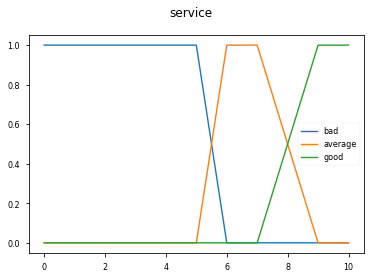

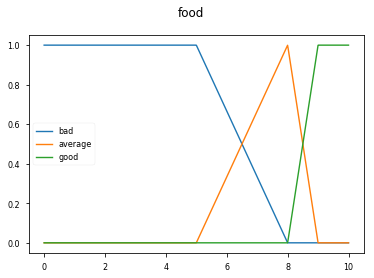

In [4]:
for var in inputs:
    mf_names = [fs for fs in var]
    X = np.linspace(*var.domain, 1000)
    Y = np.array([
        [var[mf_name](x) for mf_name in mf_names]
        for x in X
    ])

    # Plot the mfs
    fig, ax = plt.subplots(1, 1)
    fig.suptitle(var.name)
    for i, (column, label) in enumerate(zip(Y.T, mf_names)):
        ax.plot(X, column, alpha=1, label=label, color='C' + str(i));
    ax.legend(loc='best');
    fig.savefig('thesis-figures/real-tip-controller-var-{}.pdf'.format(var.name), bbox_inches='tight')

### Superficie del controlador real

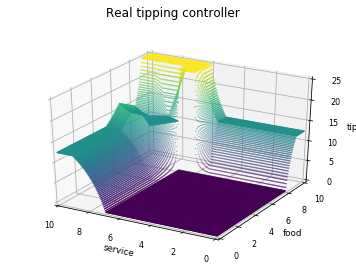

In [17]:
inferences = []
for x in np.linspace(*fz_service.domain, 250):
    for y in np.linspace(*fz_food.domain, 250):
        controller_inputs = {fz_service.name: x, fz_food.name: y}
        z = fcs.eval(controller_inputs)[fz_tip.name]
        inferences.append((x, y, z))
inferences = np.array(inferences)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('Real tipping controller')
ax.set_xlim(max(fz_service.domain), min(fz_service.domain))
ax.set_ylim(min(fz_food.domain), max(fz_food.domain))
ax.set_zlim(min(fz_tip.domain), max(fz_tip.domain))
ax.set_xlabel(fz_service.name)
ax.set_ylabel(fz_food.name)
ax.set_zlabel(fz_tip.name)
ax.scatter(
    [x for x, _, _ in inferences],
    [y for _, y, _ in inferences],
    [z for _, _, z in inferences],
    c=[z for _, _, z in inferences],
    s = 1
);
fig.savefig('thesis-figures/real-tip-controller-surface.pdf', bbox_inches='tight')

### Ajuste con controlador basado en descenso del gradiente

In [20]:
# Sacamos conjunto de datos aleatorios
random_idx = np.random.randint(inferences.shape[0], size=5000)
random_points = inferences[random_idx]
np.save('thesis-figures/data/real-tip-controller-random-data', random_points)

#### Superficie del controlador

IndexError: pop from empty list

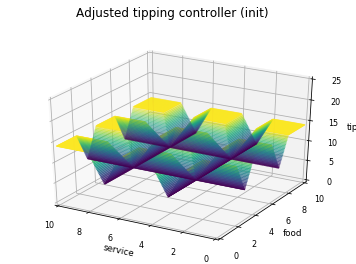

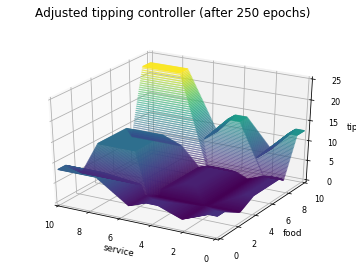

In [28]:
random_points = np.load('thesis-figures/data/real-tip-controller-random-data.npy')

# Creamos el controlador y lo ajustamos
LEARNING_RATE = 0.01
EPOCHS = 1000

tf.reset_default_graph()

service = tfz.IVar(name='service', fuzzy_sets=3, domain=(0, 10))
food = tfz.IVar(name='food', fuzzy_sets=3, domain=(0, 10))
tip = tfz.OVar(name='tip', values=(0, 25))

x, ŷ = tfz.fuzzy_controller(
    i_vars=[service, food],
    o_var=tip
)
y = tf.placeholder(tf.float32)
cost = tf.sqrt(tf.reduce_mean(tf.squared_difference(y, ŷ)))
train = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cost)

inputs = random_points[:,:2]
output = random_points[:,2][:,None]

init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.suptitle('Adjusted tipping controller (init)')
    ax.set_xlim(max(fz_service.domain), min(fz_service.domain))
    ax.set_ylim(min(fz_food.domain), max(fz_food.domain))
    ax.set_zlim(min(fz_tip.domain), max(fz_tip.domain))
    ax.set_xlabel(fz_service.name)
    ax.set_ylabel(fz_food.name)
    ax.set_zlabel(fz_tip.name)
    inference_result = session.run(ŷ, feed_dict={x: inferences[:,:2]})
    ax.scatter(
        inferences[:,0],
        inferences[:,1],
        inference_result,
        c=inference_result.flatten(),
        s = 1,
    )
    fig.savefig('thesis-figures/ajusted-tip-controller-at-init-training.pdf', bbox_inches='tight')

    feed_dict = {x: inputs, y: output}
    rmss = [session.run(cost, feed_dict={x: inferences[:,:2], y: inferences[:,2][:,None]})]
    for step in range(EPOCHS):
        session.run(train, feed_dict=feed_dict)

        if step == 250:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            fig.suptitle('Adjusted tipping controller (after {} epochs)'.format(step))
            ax.set_xlim(max(fz_service.domain), min(fz_service.domain))
            ax.set_ylim(min(fz_food.domain), max(fz_food.domain))
            ax.set_zlim(min(fz_tip.domain), max(fz_tip.domain))
            ax.set_xlabel(fz_service.name)
            ax.set_ylabel(fz_food.name)
            ax.set_zlabel(fz_tip.name)    
            inference_result = session.run(ŷ, feed_dict={x: inferences[:,:2]})
            ax.scatter(
                inferences[:,0],
                inferences[:,1],
                inference_result,
                c=inference_result.flatten(),
                s = 1,
            )
            kind = figures_to_save.pop(0)
            fig.savefig('thesis-figures/ajusted-tip-controller-at-half-training.pdf', bbox_inches='tight')
        rmss.append(session.run(cost, feed_dict={x: inferences[:,:2], y: inferences[:,2][:,None]}))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.suptitle('Adjusted tipping controller (end)')
    ax.set_xlim(max(fz_service.domain), min(fz_service.domain))
    ax.set_ylim(min(fz_food.domain), max(fz_food.domain))
    ax.set_zlim(min(fz_tip.domain), max(fz_tip.domain))
    ax.set_xlabel(fz_service.name)
    ax.set_ylabel(fz_food.name)
    ax.set_zlabel(fz_tip.name)
    inference_result = session.run(ŷ, feed_dict={x: inferences[:,:2]})
    ax.scatter(
        inferences[:,0],
        inferences[:,1],
        inference_result,
        c=inference_result.flatten(),
        s = 1,
    )
    kind = figures_to_save.pop(0)
    fig.savefig('thesis-figures/ajusted-tip-controller-at-end-training.pdf', bbox_inches='tight')

# Impresión del RMS a lo largo del entrenamiento
fig, ax = plt.subplots(1, 1)
ax.set_title('RMS during training')
ax.plot(rmss)
fig.savefig('thesis-figures/fcs-ajustment-rms-during-training.pdf', bbox_inches='tight')
    